In [271]:
# Dependicies 
import requests as req
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

from census import Census
from us import states

from datetime import datetime 

import csv

from census import Census
from us import states


#import prettytable



In [272]:
# US Debt
target_url = "https://www.treasurydirect.gov/NP_WS/debt/search?startdate=2011-01-01&enddate=2015-12-31&format=json"
target_req = req.get(target_url)
debt_data = target_req.json()



In [273]:
# Create Data Frame from dictionary
#Put everything from scientific notation to float format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
debt_df = pd.DataFrame.from_records(debt_data['entries'])

# Rename Columns
debt_df.columns = ['Date', 'Government Holdings', 'Public Debt', 'Total Debt']

debt_df.head()

,Date,Government Holdings,Public Debt,Total Debt
0,"December 31, 2015 EST",5249656752129.30,13672522257291.59,18922179009420.89
1,"December 30, 2015 EST",5202328627046.20,13622733037489.74,18825061664535.94
2,"December 29, 2015 EST",5202112051802.47,13621994782159.41,18824106833961.88
3,"December 28, 2015 EST",5197399905839.72,13621291360268.39,18818691266108.11
4,"December 24, 2015 EST",5194774066145.61,13608106425390.39,18802880491536.00


In [274]:

debt_df['Date'] = debt_df['Date'].str.replace(' EST', '')
debt_df['Date'] = debt_df['Date'].str.replace(' EDT', '')



debt_df['Date'] = pd.to_datetime(debt_df['Date'], format = "%B  %d, %Y")
    

In [275]:
debt_df.head()


,Date,Government Holdings,Public Debt,Total Debt
0,2015-12-31,5249656752129.30,13672522257291.59,18922179009420.89
1,2015-12-30,5202328627046.20,13622733037489.74,18825061664535.94
2,2015-12-29,5202112051802.47,13621994782159.41,18824106833961.88
3,2015-12-28,5197399905839.72,13621291360268.39,18818691266108.11
4,2015-12-24,5194774066145.61,13608106425390.39,18802880491536.00


In [276]:
year = debt_df['Date'].dt.year
month = debt_df['Date'].dt.month
day = debt_df['Date'].dt.day


debt_df['Year'] = year
debt_df['Month'] = month
debt_df['Day'] = day

debt_df.head()

,Date,Government Holdings,Public Debt,Total Debt,Year,Month,Day
0,2015-12-31,5249656752129.30,13672522257291.59,18922179009420.89,2015,12,31
1,2015-12-30,5202328627046.20,13622733037489.74,18825061664535.94,2015,12,30
2,2015-12-29,5202112051802.47,13621994782159.41,18824106833961.88,2015,12,29
3,2015-12-28,5197399905839.72,13621291360268.39,18818691266108.11,2015,12,28
4,2015-12-24,5194774066145.61,13608106425390.39,18802880491536.00,2015,12,24


In [277]:
last_month = debt_df.loc[debt_df['Month'] == 12]
yearly_total = last_month[last_month['Day'] == 31]

yearly_total

,Date,Government Holdings,Public Debt,Total Debt,Year,Month,Day
0,2015-12-31,5249656752129.30,13672522257291.59,18922179009420.89,2015,12,31
252,2014-12-31,5117492754794.72,13023951380768.58,18141444135563.30,2014,12,31
503,2013-12-31,4996544261665.60,12355426523284.55,17351970784950.15,2013,12,31
754,2012-12-31,4851212500174.05,11581517550395.07,16432730050569.12,2012,12,31


In [278]:
year_2011 = last_month.loc[debt_df['Year']==2011]
yearly_total_2011 = year_2011.loc[year_2011['Day'] == 30]
yearly_total_2011

yearly_total = yearly_total.append(yearly_total_2011)
yearly_total.sort_values('Year')


,Date,Government Holdings,Public Debt,Total Debt,Year,Month,Day
1005,2011-12-30,4775277193643.94,10447662851807.15,15222940045451.09,2011,12,30
754,2012-12-31,4851212500174.05,11581517550395.07,16432730050569.12,2012,12,31
503,2013-12-31,4996544261665.60,12355426523284.55,17351970784950.15,2013,12,31
252,2014-12-31,5117492754794.72,13023951380768.58,18141444135563.30,2014,12,31
0,2015-12-31,5249656752129.30,13672522257291.59,18922179009420.89,2015,12,31


In [279]:
# Save Config
api_key = "7824425f0ce43628c75b09e5bfc7c575e283699e"
url = "https://api.census.gov/data/"


In [280]:
# Pull data on businesses and number of establishments

years = ['2011', '2012', '2013', '2014', '2015']

# Query gets us Number of employees, establishments, size of establishments, year of data collected, annual pay, name of state, for each state
query = "EMP,EMPSZES,EMPSZES_TTL,ESTAB,YEAR,PAYANN,GEO_TTL&for=state:*"

cbp_df = pd.DataFrame()

for year in years: 
    # Build query URL
    query_url = url + year + "/cbp?get=" + query + "&key=" + api_key 

    # This should get us all establishments of employment in each state for the 2015 year.
    cbp_response = req.get(query_url)
    cbp_json = cbp_response.json()
    this_year_cbp = pd.DataFrame(cbp_json, columns =['EMP','EMPSZES','EMPSZES_TTL','ESTAB','YEAR','PAYANN','GEO_TTL','State'])
    
    cbp_df = cbp_df.append(this_year_cbp)


cbp_df.head()

,EMP,EMPSZES,EMPSZES_TTL,ESTAB,YEAR,PAYANN,GEO_TTL,State
0,EMP,EMPSZES,EMPSZES_TTL,ESTAB,YEAR,PAYANN,GEO_TTL,state
1,1573138,001,All establishments,97743,2011,59241365,Alabama,01
2,93632,212,Establishments with 1 to 4 employees,49042,2011,3243664,Alabama,01
3,136248,220,Establishments with 5 to 9 employees,20633,2011,4233100,Alabama,01
4,185939,230,Establishments with 10 to 19 employees,13792,2011,6005020,Alabama,01


In [281]:
clean_cbp = cbp_df.drop([0]).reset_index()

cbp_df = pd.DataFrame(clean_cbp, columns=['GEO_TTL','State','ESTAB','EMP','EMPSZES_TTL','PAYANN','YEAR'])

cbp_df = cbp_df.rename(columns={'GEO_TTL' : 'State', 
                               'State' : 'State ID',
                               'ESTAB' : 'Number of Establishments',
                               'EMP' : 'Employees',
                               'EMPSZES_TTL' : 'Establishment_Size', 
                               'PAYANN' : 'Annual Pay',
                               'YEAR' : 'Year'})

cbp_df.head()


,State,State ID,Number of Establishments,Employees,Establishment_Size,Annual Pay,Year
0,Alabama,01,97743,1573138,All establishments,59241365,2011
1,Alabama,01,49042,93632,Establishments with 1 to 4 employees,3243664,2011
2,Alabama,01,20633,136248,Establishments with 5 to 9 employees,4233100,2011
3,Alabama,01,13792,185939,Establishments with 10 to 19 employees,6005020,2011
4,Alabama,01,9097,272048,Establishments with 20 to 49 employees,9039895,2011


In [282]:
#Create Brackets for different sizes of businesses 

small_size_biz_values = ["Establishments with 1 to 4 employees","Establishments with 5 to 9 employees",
                         "Establishments with 10 to 19 employees","Establishments with 20 to 49 employees",
                        "Establishments with 50 to 99 employees"]
med_size_biz_values = ["Establishments with 100 to 249 employees","Establishments with 250 to 499 employees",
                         "Establishments with 500 to 999 employees"]
large_size_biz_values = ["Establishments with 1,000 employees or more"]

#Create seperate data frames for each business size
small_biz= cbp_df[cbp_df.Establishment_Size.isin(small_size_biz_values)]
small_biz= small_biz.reset_index(drop=True)


med_biz= cbp_df[cbp_df.Establishment_Size.isin(med_size_biz_values)]
med_biz= med_biz.reset_index(drop=True)

large_biz= cbp_df[cbp_df.Establishment_Size.isin(large_size_biz_values)]
large_biz= large_biz.reset_index(drop=True)

med_biz.head()

,State,State ID,Number of Establishments,Employees,Establishment_Size,Annual Pay,Year
0,Alabama,01,1586,237445,Establishments with 100 to 249 employees,9152440,2011
1,Alabama,01,447,155962,Establishments with 250 to 499 employees,6529962,2011
2,Alabama,01,173,118952,Establishments with 500 to 999 employees,5598326,2011
3,Alaska,02,263,40410,Establishments with 100 to 249 employees,2022051,2011
4,Alaska,02,70,25318,Establishments with 250 to 499 employees,1499181,2011


In [283]:
# Make values into integers

small_biz['Number of Establishments'] = small_biz['Number of Establishments'].astype(int)
small_biz['Employees'] = small_biz['Employees'].astype(int)
small_biz['Annual Pay'] = small_biz['Annual Pay'].astype(int)

med_biz['Number of Establishments'] = med_biz['Number of Establishments'].astype(int)
med_biz['Employees'] = med_biz['Employees'].astype(int)
med_biz['Annual Pay'] = med_biz['Annual Pay'].astype(int)

large_biz['Number of Establishments'] = large_biz['Number of Establishments'].astype(int)
large_biz['Employees'] = large_biz['Employees'].astype(int)
large_biz['Annual Pay'] = large_biz['Annual Pay'].astype(int)


In [284]:
# Select States by year


# Small Biz
small_biz_2011 = small_biz.loc[small_biz['Year'] == '2011']
small_biz_2012 = small_biz.loc[small_biz['Year'] == '2012']
small_biz_2013 = small_biz.loc[small_biz['Year'] == '2013']
small_biz_2014 = small_biz.loc[small_biz['Year'] == '2014']
small_biz_2015 = small_biz.loc[small_biz['Year'] == '2015']

# Med Biz
med_biz_2011 = med_biz.loc[med_biz['Year'] == '2011']
med_biz_2012 = med_biz.loc[med_biz['Year'] == '2012']
med_biz_2013 = med_biz.loc[med_biz['Year'] == '2013']
med_biz_2014 = med_biz.loc[med_biz['Year'] == '2014']
med_biz_2015 = med_biz.loc[med_biz['Year'] == '2015']

# Large Biz
large_biz_2011 = large_biz.loc[large_biz['Year'] == '2011']
large_biz_2012 = large_biz.loc[large_biz['Year'] == '2012']
large_biz_2013 = large_biz.loc[large_biz['Year'] == '2013']
large_biz_2014 = large_biz.loc[large_biz['Year'] == '2014']
large_biz_2015 = large_biz.loc[large_biz['Year'] == '2015']

small_biz_2011.head()

,State,State ID,Number of Establishments,Employees,Establishment_Size,Annual Pay,Year
0,Alabama,01,49042,93632,Establishments with 1 to 4 employees,3243664,2011
1,Alabama,01,20633,136248,Establishments with 5 to 9 employees,4233100,2011
2,Alabama,01,13792,185939,Establishments with 10 to 19 employees,6005020,2011
3,Alabama,01,9097,272048,Establishments with 20 to 49 employees,9039895,2011
4,Alabama,01,2879,198418,Establishments with 50 to 99 employees,7309618,2011


In [285]:
# Business Types Sums

# Small Business Sums

sb2011_sums = small_biz_2011.groupby('State').sum(numeric_only=True)
sb2011_sums = sb2011_sums.reset_index(drop=False)
sb2011_sums = sb2011_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Small Business Number of Establishments',
                                          'Employees':'Small Business Employees',
                                          'Annual Pay':'Small Business Annual Pay'})

sb2012_sums = small_biz_2012.groupby('State').sum(numeric_only=True)
sb2012_sums = sb2012_sums.reset_index(drop=False)
sb2012_sums = sb2012_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Small Business Number of Establishments',
                                          'Employees':'Small Business Employees',
                                          'Annual Pay':'Small Business Annual Pay'})

sb2013_sums = small_biz_2013.groupby('State').sum(numeric_only=True)
sb2013_sums = sb2013_sums.reset_index(drop=False)
sb2013_sums = sb2013_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Small Business Number of Establishments',
                                          'Employees':'Small Business Employees',
                                          'Annual Pay':'Small Business Annual Pay'})

sb2014_sums = small_biz_2014.groupby('State').sum(numeric_only=True)
sb2014_sums = sb2014_sums.reset_index(drop=False)
sb2014_sums = sb2014_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Small Business Number of Establishments',
                                          'Employees':'Small Business Employees',
                                          'Annual Pay':'Small Business Annual Pay'})

sb2015_sums = small_biz_2015.groupby('State').sum(numeric_only=True)
sb2015_sums = sb2015_sums.reset_index(drop=False)
sb2015_sums = sb2015_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Small Business Number of Establishments',
                                          'Employees':'Small Business Employees',
                                          'Annual Pay':'Small Business Annual Pay'})


# Medium Business Sums

mb2011_sums = med_biz_2011.groupby('State').sum(numeric_only=True)
mb2011_sums = mb2011_sums.reset_index(drop=False)
mb2011_sums = mb2011_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Medium Business Number of Establishments',
                                          'Employees':'Medium Business Employees',
                                          'Annual Pay':'Medium Business Annual Pay'})

mb2012_sums = med_biz_2012.groupby('State').sum(numeric_only=True)
mb2012_sums = mb2012_sums.reset_index(drop=False)
mb2012_sums = mb2012_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Medium Business Number of Establishments',
                                          'Employees':'Medium Business Employees',
                                          'Annual Pay':'Medium Business Annual Pay'})

mb2013_sums = med_biz_2013.groupby('State').sum(numeric_only=True)
mb2013_sums = mb2013_sums.reset_index(drop=False)
mb2013_sums = mb2013_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Medium Business Number of Establishments',
                                          'Employees':'Medium Business Employees',
                                          'Annual Pay':'Medium Business Annual Pay'})

mb2014_sums = med_biz_2014.groupby('State').sum(numeric_only=True)
mb2014_sums = mb2014_sums.reset_index(drop=False)
mb2014_sums = mb2014_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Medium Business Number of Establishments',
                                          'Employees':'Medium Business Employees',
                                          'Annual Pay':'Medium Business Annual Pay'})

mb2015_sums = med_biz_2015.groupby('State').sum(numeric_only=True)
mb2015_sums = mb2015_sums.reset_index(drop=False)
mb2015_sums = mb2015_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Medium Business Number of Establishments',
                                          'Employees':'Medium Business Employees',
                                          'Annual Pay':'Medium Business Annual Pay'})


# Large Business Sums

lb2011_sums = large_biz_2011.groupby('State').sum(numeric_only=True)
lb2011_sums = lb2011_sums.reset_index(drop=False)
lb2011_sums = lb2011_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Large Business Number of Establishments',
                                          'Employees':'Large Business Employees',
                                          'Annual Pay':'Large Business Annual Pay'})

lb2012_sums = large_biz_2012.groupby('State').sum(numeric_only=True)
lb2012_sums = lb2012_sums.reset_index(drop=False)
lb2012_sums = lb2012_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Large Business Number of Establishments',
                                          'Employees':'Large Business Employees',
                                          'Annual Pay':'Large Business Annual Pay'})

lb2013_sums = large_biz_2013.groupby('State').sum(numeric_only=True)
lb2013_sums = lb2013_sums.reset_index(drop=False)
lb2013_sums = lb2013_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Large Business Number of Establishments',
                                          'Employees':'Large Business Employees',
                                          'Annual Pay':'Large Business Annual Pay'})

lb2014_sums = large_biz_2014.groupby('State').sum(numeric_only=True)
lb2014_sums = lb2014_sums.reset_index(drop=False)
lb2014_sums = lb2014_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Large Business Number of Establishments',
                                          'Employees':'Large Business Employees',
                                          'Annual Pay':'Large Business Annual Pay'})

lb2015_sums = large_biz_2015.groupby('State').sum(numeric_only=True)
lb2015_sums = lb2015_sums.reset_index(drop=False)
lb2015_sums = lb2015_sums.rename(columns={'State' : 'Name',
                                          'Number of Establishments':'Large Business Number of Establishments',
                                          'Employees':'Large Business Employees',
                                          'Annual Pay':'Large Business Annual Pay'})

#dataframes = [lb2014_sums, lb2015_sums]

#for x in dataframes:
 #   x.rename(columns={'State' : 'Name',
  #                                        'Number of Establishments':'Large Business Number of Establishments',
   #                                       'Employees':'Large Business Employees',
    #                                      'Annual Pay':'Large Business Annual Pay'})
    

sb2014_sums.head(10)

,Name,Small Business Number of Establishments,Small Business Employees,Small Business Annual Pay
0,Alabama,95305,904994,32291808
1,Alaska,20352,159034,8222787
2,American Samoa,473,4067,63048
3,Arizona,131069,1187520,44759598
4,Arkansas,63241,571030,20530045
5,California,869876,7482845,344342143
6,Colorado,154953,1221049,53334285
7,Commonwealth of the Northern Mariana Islands,1406,7269,115027
8,Connecticut,86245,783973,40301734
9,Delaware,23734,206515,8736052


In [286]:
# Increase of small, med, and large bussines over time compared to 
# Debt
# Per capita income
# Poverty Rate
# Unemployment


# Scatter
# Scatter states of small business from 2011-2015
# Scatter states of medium business from 2011-2015
# Scatter states of large business from 2011-2015




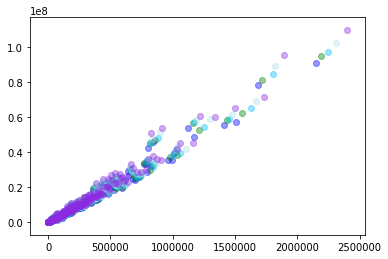

In [287]:
# Small Business Scatter Plot Comparing Employees vs Annual Pay

plt.scatter(small_biz_2011['Employees'],
           small_biz_2011['Annual Pay'],
           linewidths=1, marker = 'o',
           alpha=0.4, c='b', label='2011')

plt.scatter(small_biz_2012['Employees'],
           small_biz_2012['Annual Pay'],
           linewidths=1, marker = 'o',
           alpha=0.4, c='g', label='2012')

plt.scatter(small_biz_2013['Employees'],
           small_biz_2013['Annual Pay'],
           linewidths=1, marker = 'o',
           alpha=0.4, c='deepskyblue', label='2013')

plt.scatter(small_biz_2014['Employees'],
           small_biz_2014['Annual Pay'],
           linewidths=1, marker = 'o',
           alpha=0.4, c='powderblue', label='2014')

plt.scatter(small_biz_2015['Employees'],
           small_biz_2015['Annual Pay'],
           linewidths=1, marker = 'o',
           alpha=0.4, c='blueviolet', label='2015')

plt.show()


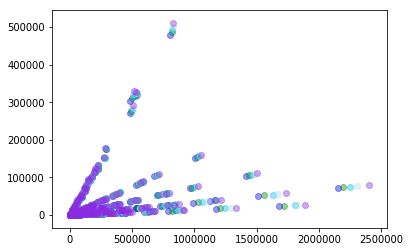

In [288]:
# Small Business Scatter Plot Comparing Employees vs Number of Establishments Pay


plt.scatter(small_biz_2011['Employees'],
           small_biz_2011['Number of Establishments'],
           linewidths=1, marker = 'o',
           alpha=0.4, c='b', label='2011')

plt.scatter(small_biz_2012['Employees'],
           small_biz_2012['Number of Establishments'],
           linewidths=1, marker = 'o',
           alpha=0.4, c='g', label='2012')

plt.scatter(small_biz_2013['Employees'],
           small_biz_2013['Number of Establishments'],
           linewidths=1, marker = 'o',
           alpha=0.4, c='deepskyblue', label='2013')

plt.scatter(small_biz_2014['Employees'],
           small_biz_2014['Number of Establishments'],
           linewidths=1, marker = 'o',
           alpha=0.4, c='powderblue', label='2014')

plt.scatter(small_biz_2015['Employees'],
           small_biz_2015['Number of Establishments'],
           linewidths=1, marker = 'o',
           alpha=0.4, c='blueviolet', label='2015')


# Other graph properties

#plt.title('Employees vs Number of Establishments')
#plt.xlabel('Employees')
#plt.ylabel('Number of Establishments')
#plt.grid(True)
#plt.xlim([-10, 80])
#plt.ylim([-20, 120])

# Save figure
#plt.savefig('Temperature_vs_Latitude.png')

# Plot
plt.show()



In [289]:
# Save config information
api_key = Census("7824425f0ce43628c75b09e5bfc7c575e283699e", year=2015)


census_data = api_key.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population", 
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * census_pd["Unemployment Count"].astype(int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd_2015 = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd_2015.insert(0, 'Year', '2015')
census_pd_2015.head()


,Year,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,2015,02,Alaska,733375.00,33.40,72515.00,33413.00,72957.00,9.95,4.27
1,2015,01,Alabama,4830620.00,38.40,43623.00,24091.00,887260.00,18.37,4.29
2,2015,05,Arkansas,2958208.00,37.70,41371.00,22798.00,553644.00,18.72,3.55
3,2015,04,Arizona,6641928.00,36.80,50255.00,25848.00,1180690.00,17.78,4.15
4,2015,06,California,38421464.00,35.80,61818.00,30318.00,6135142.00,15.97,4.92


In [290]:
# Merge


employment_census_2015s = pd.merge(census_pd_2015, sb2015_sums, how='inner', on=['Name'])
employment_census_2015m = pd.merge(employment_census_2015s, mb2015_sums, how='inner', on=['Name'])
employment_census_2015 = pd.merge(employment_census_2015m, lb2015_sums, how='inner', on=['Name'])

employment_census_2015.head()

,Year,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Small Business Number of Establishments,Small Business Employees,Small Business Annual Pay,Medium Business Number of Establishments,Medium Business Employees,Medium Business Annual Pay,Large Business Number of Establishments,Large Business Employees,Large Business Annual Pay
0,2015,02,Alaska,733375.00,33.40,72515.00,33413.00,72957.00,9.95,4.27,20510,161193,8583546,384,87605,5679447,13,19201,1380310
1,2015,01,Alabama,4830620.00,38.40,43623.00,24091.00,887260.00,18.37,4.29,96098,920075,33802854,2353,546730,24398301,89,167586,9169198
2,2015,05,Arkansas,2958208.00,37.70,41371.00,22798.00,553644.00,18.72,3.55,63755,580115,21484830,1361,320161,13700756,59,102837,4265605
3,2015,04,Arizona,6641928.00,36.80,50255.00,25848.00,1180690.00,17.78,4.15,132892,1218299,47176574,3321,756946,35269507,139,319941,20225312
4,2015,06,California,38421464.00,35.80,61818.00,30318.00,6135142.00,15.97,4.92,887658,7669978,366082479,19584,4308732,288976084,878,2346667,201895683


In [291]:
# Save config information
api_key = Census("7824425f0ce43628c75b09e5bfc7c575e283699e", year=2014)


census_data = api_key.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population", 
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * census_pd["Unemployment Count"].astype(int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd_2014 = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]


census_pd_2014.insert(0, 'Year', '2014')


employment_census_2014s = pd.merge(census_pd_2014, sb2014_sums, how='inner', on=['Name'])
employment_census_2014m = pd.merge(employment_census_2014s, mb2014_sums, how='inner', on=['Name'])
employment_census_2014 = pd.merge(employment_census_2014m, lb2014_sums, how='inner', on=['Name'])

employment_census_2014.head()

,Year,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Small Business Number of Establishments,Small Business Employees,Small Business Annual Pay,Medium Business Number of Establishments,Medium Business Employees,Medium Business Annual Pay,Large Business Number of Establishments,Large Business Employees,Large Business Annual Pay
0,2014,01,Alabama,4817678.00,38.20,43511.00,23936.00,889710.00,18.47,4.75,95305,904994,32291808,2321,536126,23264803,88,162896,8734891
1,2014,02,Alaska,728300.00,33.40,71829.00,33129.00,71866.00,9.87,4.41,20352,159034,8222787,388,90145,5651558,12,17707,1400786
2,2014,04,Arizona,6561516.00,36.50,49928.00,25537.00,1169309.00,17.82,4.63,131069,1187520,44759598,3228,733763,32888952,137,319794,19147688
3,2014,05,Arkansas,2947036.00,37.60,41264.00,22595.00,549303.00,18.64,3.91,63241,571030,20530045,1369,317285,13474208,60,103886,4330863
4,2014,06,California,38066920.00,35.60,61489.00,29906.00,6115244.00,16.06,5.48,869876,7482845,344342143,18918,4134841,267955398,852,2221016,184748193


In [292]:
# Save config information
api_key = Census("7824425f0ce43628c75b09e5bfc7c575e283699e", year=2013)


census_data = api_key.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population", 
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * census_pd["Unemployment Count"].astype(int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd_2013 = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]


census_pd_2013.insert(0, 'Year', '2013')


employment_census_2013s = pd.merge(census_pd_2013, sb2013_sums, how='inner', on=['Name'])
employment_census_2013m = pd.merge(employment_census_2013s, mb2013_sums, how='inner', on=['Name'])
employment_census_2013 = pd.merge(employment_census_2013m, lb2013_sums, how='inner', on=['Name'])

employment_census_2013.head()

,Year,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Small Business Number of Establishments,Small Business Employees,Small Business Annual Pay,Medium Business Number of Establishments,Medium Business Employees,Medium Business Annual Pay,Large Business Number of Establishments,Large Business Employees,Large Business Annual Pay
0,2013,01,Alabama,4799277.00,38.10,43253.00,23680.00,870631.00,18.14,5.04,95154,893741,31077795,2336,543225,22764818,88,166134,8565674
1,2013,02,Alaska,720316.00,33.60,70760.00,32651.00,69514.00,9.65,4.57,20118,155418,7776263,387,89605,5362524,14,21604,1462329
2,2013,04,Arizona,6479703.00,36.30,49774.00,25358.00,1131901.00,17.47,4.88,129468,1158600,42599403,3161,705228,30868152,133,309377,19302533
3,2013,05,Arkansas,2933369.00,37.50,40768.00,22170.00,547328.00,18.66,4.13,63390,566248,19800020,1321,302994,12407630,61,108852,4600446
4,2013,06,California,37659181.00,35.40,61094.00,29527.00,5885417.00,15.63,5.76,855308,7356230,328398008,18107,3965144,248216028,828,2080489,165909817


In [293]:
# Save config information
api_key = Census("7824425f0ce43628c75b09e5bfc7c575e283699e", year=2012)


census_data = api_key.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population", 
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * census_pd["Unemployment Count"].astype(int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd_2012 = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]


census_pd_2012.insert(0, 'Year', '2012')

employment_census_2012s = pd.merge(census_pd_2012, sb2012_sums, how='inner', on=['Name'])
employment_census_2012m = pd.merge(employment_census_2012s, mb2012_sums, how='inner', on=['Name'])
employment_census_2012 = pd.merge(employment_census_2012m, lb2012_sums, how='inner', on=['Name'])

employment_census_2012.head()

,Year,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Small Business Number of Establishments,Small Business Employees,Small Business Annual Pay,Medium Business Number of Establishments,Medium Business Employees,Medium Business Annual Pay,Large Business Number of Establishments,Large Business Employees,Large Business Annual Pay
0,2012,01,Alabama,4777326.00,37.80,43160.00,23587.00,842292.00,17.63,4.83,95569,890061,30593189,2283,529334,22202983,86,166366,8488759
1,2012,02,Alaska,711139.00,33.80,69917.00,32537.00,66631.00,9.37,4.41,20051,153808,7556795,363,84966,5002696,13,19445,1426912
2,2012,04,Arizona,6410979.00,36.00,50256.00,25571.00,1074986.00,16.77,4.62,128194,1134876,41243674,3048,684955,30367528,133,314421,19227414
3,2012,05,Arkansas,2916372.00,37.40,40531.00,22007.00,530309.00,18.18,4.02,63400,562316,18801261,1357,315065,12700123,58,101138,4132204
4,2012,06,California,37325068.00,35.20,61400.00,29551.00,5590100.00,14.98,5.52,846617,7189880,320860296,17515,3825067,230135155,781,1937871,149106928


In [294]:
# Save config information
api_key = Census("7824425f0ce43628c75b09e5bfc7c575e283699e", year=2011)


census_data = api_key.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population", 
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * census_pd["Unemployment Count"].astype(int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd_2011 = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]


census_pd_2011.insert(0, 'Year', '2011')

employment_census_2011s = pd.merge(census_pd_2011, sb2011_sums, how='inner', on=['Name'])
employment_census_2011m = pd.merge(employment_census_2011s, mb2011_sums, how='inner', on=['Name'])
employment_census_2011 = pd.merge(employment_census_2011m, lb2011_sums, how='inner', on=['Name'])

employment_census_2011.head()

,Year,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Small Business Number of Establishments,Small Business Employees,Small Business Annual Pay,Medium Business Number of Establishments,Medium Business Employees,Medium Business Annual Pay,Large Business Number of Establishments,Large Business Employees,Large Business Annual Pay
0,2011,01,Alabama,4747424,37.7,42934,23483,813385,17.13,4.54,95443,886285,29831297,2206,512359,21280728,94,174494,8129340
1,2011,02,Alaska,700703,33.8,69014,31944,65111,9.29,4.41,19746,149639,7252518,357,81009,4510297,16,24348,1631202
2,2011,04,Arizona,6337373,35.7,50752,25784,1003575,15.84,4.23,127160,1112024,39153663,3016,685380,29231505,129,311157,18148105
3,2011,05,Arkansas,2895928,37.3,40149,21833,516822,17.85,3.94,63025,555888,18396762,1391,322364,12800812,55,102392,4114791
4,2011,06,California,36969200,35.1,61632,29634,5211481,14.10,5.06,831559,7055379,306879132,16994,3718068,217939032,763,1924980,138752493


In [295]:
#add minimum wage info
min_wage = "minimum_wage.xlsx"
min_wage_df = pd.read_excel(min_wage, sheetname='Cleaned')
c_min_wage_df = min_wage_df.drop([0,1]).reset_index()


del c_min_wage_df['index']
c_min_wage_df
stk_min_wage = pd.melt(c_min_wage_df, id_vars=['State or other'], var_name='Year_y')

stk_min_wage['key_id'] = stk_min_wage['State or other'] + stk_min_wage['Year_y'].map(str)

stk_min_wage.head()


,State or other,Year_y,value,key_id
0,Alabama,2010,7.25,Alabama2010
1,Alaska,2010,7.75,Alaska2010
2,Arizona,2010,7.25,Arizona2010
3,Arkansas,2010,7.25,Arkansas2010
4,California,2010,8.00,California2010


In [296]:
#add population density info
#add minimum wage info
pop_dense = "pop_dense_2010.xlsx"
pop_dense_df = pd.read_excel(pop_dense, sheetname='Cleaned').reset_index()
pop_dense_df['Name'] = pop_dense_df['index']
del pop_dense_df['index']
pop_dense_df.head()

,Population Density,Name
0,94.40,Alabama
1,1.20,Alaska
2,56.30,Arizona
3,56.00,Arkansas
4,239.10,California


In [297]:
combo_census1 = employment_census_2015.append(employment_census_2014)
combo_census2 = combo_census1.append(employment_census_2013)
combo_census3 = combo_census2.append(employment_census_2012)
combo_census = combo_census3.append(employment_census_2011)
combo_census['Population'] = combo_census['Population'].astype(int)
combo_census['Poverty Count'] = combo_census['Poverty Count'].astype(int)
combo_census['key_id'] = combo_census['Name'] + combo_census['Year']


combo_census.head()

,Year,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Small Business Number of Establishments,Small Business Employees,Small Business Annual Pay,Medium Business Number of Establishments,Medium Business Employees,Medium Business Annual Pay,Large Business Number of Establishments,Large Business Employees,Large Business Annual Pay,key_id
0,2015,02,Alaska,733375,33.40,72515.00,33413.00,72957,9.95,4.27,20510,161193,8583546,384,87605,5679447,13,19201,1380310,Alaska2015
1,2015,01,Alabama,4830620,38.40,43623.00,24091.00,887260,18.37,4.29,96098,920075,33802854,2353,546730,24398301,89,167586,9169198,Alabama2015
2,2015,05,Arkansas,2958208,37.70,41371.00,22798.00,553644,18.72,3.55,63755,580115,21484830,1361,320161,13700756,59,102837,4265605,Arkansas2015
3,2015,04,Arizona,6641928,36.80,50255.00,25848.00,1180690,17.78,4.15,132892,1218299,47176574,3321,756946,35269507,139,319941,20225312,Arizona2015
4,2015,06,California,38421464,35.80,61818.00,30318.00,6135142,15.97,4.92,887658,7669978,366082479,19584,4308732,288976084,878,2346667,201895683,California2015


In [298]:
#merge minimum wage df to all establishment df
mer_combo_census = pd.merge(left=combo_census,right=stk_min_wage, left_on='key_id', right_on='key_id')
del mer_combo_census ['State or other']
del mer_combo_census ['Year_y']
del mer_combo_census ['State']
del mer_combo_census ['key_id']
#merge population df to all establishment df
mer_combo_census2 = pd.merge(left=mer_combo_census,right=pop_dense_df, left_on='Name', right_on='Name')
clean_combo_census = mer_combo_census2.rename(columns={"value": "Minimum Wage"})
clean_combo_census

,Year,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Small Business Number of Establishments,Small Business Employees,Small Business Annual Pay,Medium Business Number of Establishments,Medium Business Employees,Medium Business Annual Pay,Large Business Number of Establishments,Large Business Employees,Large Business Annual Pay,Minimum Wage,Population Density
0,2015,Alaska,733375,33.40,72515.00,33413.00,72957,9.95,4.27,20510,161193,8583546,384,87605,5679447,13,19201,1380310,8.75,1.20
1,2014,Alaska,728300,33.40,71829.00,33129.00,71866,9.87,4.41,20352,159034,8222787,388,90145,5651558,12,17707,1400786,7.75,1.20
2,2013,Alaska,720316,33.60,70760.00,32651.00,69514,9.65,4.57,20118,155418,7776263,387,89605,5362524,14,21604,1462329,7.75,1.20
3,2012,Alaska,711139,33.80,69917.00,32537.00,66631,9.37,4.41,20051,153808,7556795,363,84966,5002696,13,19445,1426912,7.75,1.20
4,2011,Alaska,700703,33.8,69014,31944,65111,9.29,4.41,19746,149639,7252518,357,81009,4510297,16,24348,1631202,7.75,1.20
5,2015,Alabama,4830620,38.40,43623.00,24091.00,887260,18.37,4.29,96098,920075,33802854,2353,546730,24398301,89,167586,9169198,7.25,94.40
6,2014,Alabama,4817678,38.20,43511.00,23936.00,889710,18.47,4.75,95305,904994,32291808,2321,536126,23264803,88,162896,8734891,7.25,94.40
7,2013,Alabama,4799277,38.10,43253.00,23680.00,870631,18.14,5.04,95154,893741,31077795,2336,543225,22764818,88,166134,8565674,7.25,94.40
8,2012,Alabama,4777326,37.80,43160.00,23587.00,842292,17.63,4.83,95569,890061,30593189,2283,529334,22202983,86,166366,8488759,7.25,94.40
9,2011,Alabama,4747424,37.7,42934,23483,813385,17.13,4.54,95443,886285,29831297,2206,512359,21280728,94,174494,8129340,7.25,94.40


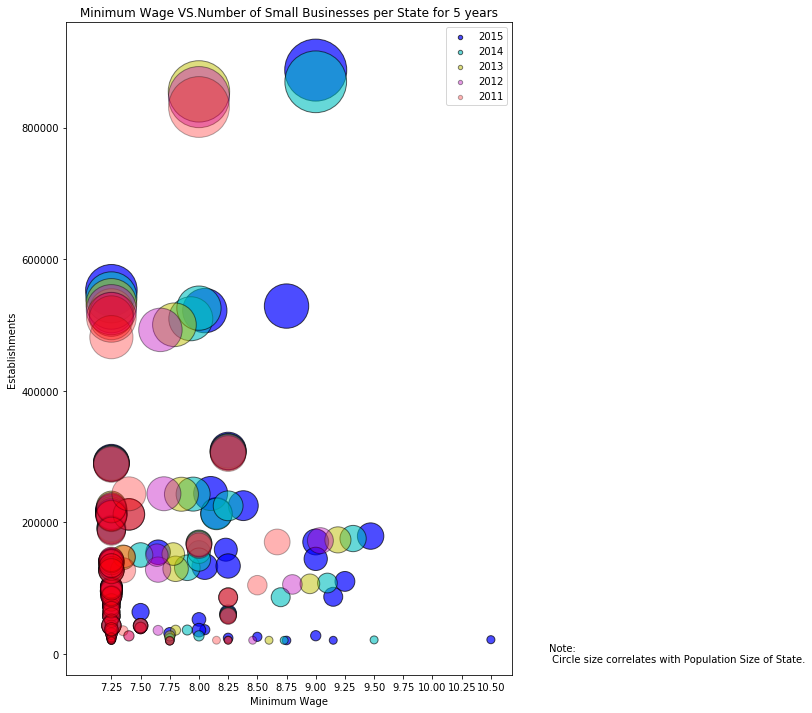

In [299]:
#graph minimum wage vs Establishments 
#Set figure size
fig = plt.figure(figsize=(8,12))

small_min_wage_plot_2015 = clean_combo_census.loc[clean_combo_census["Year"] == "2015"]
small_min_wage_plot_2014 = clean_combo_census.loc[clean_combo_census["Year"] == "2014"]
small_min_wage_plot_2013 = clean_combo_census.loc[clean_combo_census["Year"] == "2013"]
small_min_wage_plot_2012 = clean_combo_census.loc[clean_combo_census["Year"] == "2012"]
small_min_wage_plot_2011 = clean_combo_census.loc[clean_combo_census["Year"] == "2011"]

pop_count_2015 =small_min_wage_plot_2015["Population"]/10000
pop_count_2014 =small_min_wage_plot_2014["Population"]/10000
pop_count_2013 =small_min_wage_plot_2013["Population"]/10000
pop_count_2012 =small_min_wage_plot_2012["Population"]/10000
pop_count_2011 =small_min_wage_plot_2011["Population"]/10000

#plot with the colors
colors = ['b', 'c', 'y', 'm', 'r']
small_min_wage_plot_2015 = plt.scatter(small_min_wage_plot_2015["Minimum Wage"],small_min_wage_plot_2015["Small Business Number of Establishments"],
                                       c=colors[0],s=pop_count_2015, edgecolors='black',alpha=0.7)
small_min_wage_plot_2014 = plt.scatter(small_min_wage_plot_2014["Minimum Wage"],small_min_wage_plot_2014["Small Business Number of Establishments"],
                                       c=colors[1],s=pop_count_2014,edgecolors='black',alpha=0.6)
small_min_wage_plot_2013 = plt.scatter(small_min_wage_plot_2013["Minimum Wage"],small_min_wage_plot_2013["Small Business Number of Establishments"],
                                       c=colors[2],s=pop_count_2013,edgecolors='black',alpha=0.5)
small_min_wage_plot_2012 = plt.scatter(small_min_wage_plot_2012["Minimum Wage"],small_min_wage_plot_2012["Small Business Number of Establishments"],
                                       c=colors[3],s=pop_count_2012,edgecolors='black',alpha=0.4)
small_min_wage_plot_2011 = plt.scatter(small_min_wage_plot_2011["Minimum Wage"],small_min_wage_plot_2011["Small Business Number of Establishments"],
                                       c=colors[4],s=pop_count_2011,edgecolors='black',alpha=0.3)

#Add labels to the x and y axes
plt.title("Minimum Wage VS.Number of Small Businesses per State for 5 years")
plt.xlabel("Minimum Wage")
plt.ylabel("Establishments")
plt.legend((small_min_wage_plot_2015,small_min_wage_plot_2014, small_min_wage_plot_2013, small_min_wage_plot_2012,small_min_wage_plot_2011)
           ,("2015", "2014", "2013","2012","2011"),markerscale=.1)

plt.xticks(np.arange(7.25,10.75,.25), size = 10)
plt.text(11, 0,'Note: \n Circle size correlates with Population Size of State.',
     horizontalalignment='left',
     verticalalignment='center')
# Save Figure
plt.savefig("Min_wage vs. Small Est.png")

plt.show()

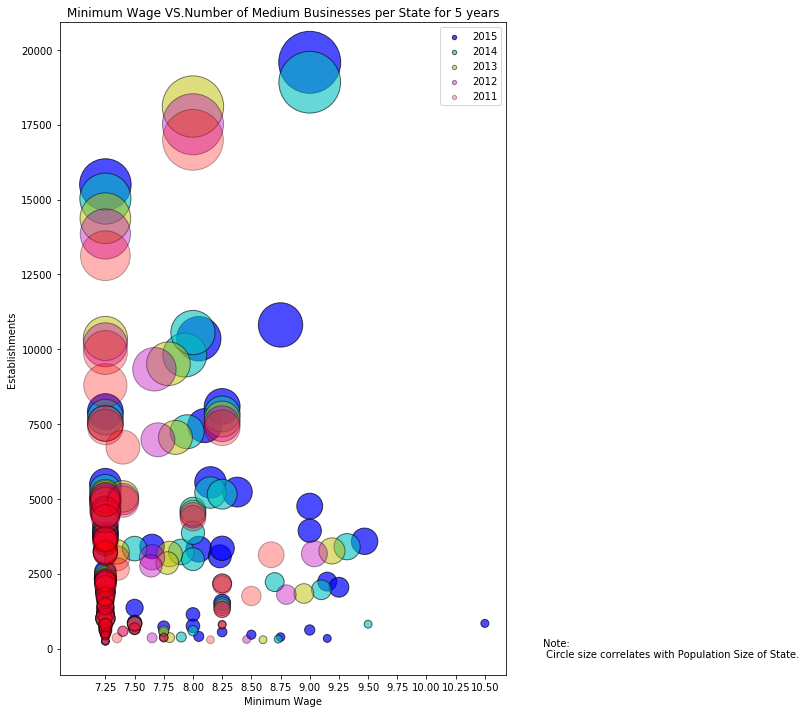

In [300]:
#graph minimum wage vs Establishments 
#Set figure size
fig = plt.figure(figsize=(8,12))

med_min_wage_plot_2015 = clean_combo_census.loc[clean_combo_census["Year"] == "2015"]
med_min_wage_plot_2014 = clean_combo_census.loc[clean_combo_census["Year"] == "2014"]
med_min_wage_plot_2013 = clean_combo_census.loc[clean_combo_census["Year"] == "2013"]
med_min_wage_plot_2012 = clean_combo_census.loc[clean_combo_census["Year"] == "2012"]
med_min_wage_plot_2011 = clean_combo_census.loc[clean_combo_census["Year"] == "2011"]

pop_count_2015 =med_min_wage_plot_2015["Population"]/10000
pop_count_2014 =med_min_wage_plot_2014["Population"]/10000
pop_count_2013 =med_min_wage_plot_2013["Population"]/10000
pop_count_2012 =med_min_wage_plot_2012["Population"]/10000
pop_count_2011 =med_min_wage_plot_2011["Population"]/10000

#plot with the colors
colors = ['b', 'c', 'y', 'm', 'r']
med_min_wage_plot_2015 = plt.scatter(med_min_wage_plot_2015["Minimum Wage"],med_min_wage_plot_2015["Medium Business Number of Establishments"],
                                       c=colors[0],s=pop_count_2015, edgecolors='black',alpha=0.7)
med_min_wage_plot_2014 = plt.scatter(med_min_wage_plot_2014["Minimum Wage"],med_min_wage_plot_2014["Medium Business Number of Establishments"],
                                       c=colors[1],s=pop_count_2014,edgecolors='black',alpha=0.6)
med_min_wage_plot_2013 = plt.scatter(med_min_wage_plot_2013["Minimum Wage"],med_min_wage_plot_2013["Medium Business Number of Establishments"],
                                       c=colors[2],s=pop_count_2013,edgecolors='black',alpha=0.5)
med_min_wage_plot_2012 = plt.scatter(med_min_wage_plot_2012["Minimum Wage"],med_min_wage_plot_2012["Medium Business Number of Establishments"],
                                       c=colors[3],s=pop_count_2012,edgecolors='black',alpha=0.4)
med_min_wage_plot_2011 = plt.scatter(med_min_wage_plot_2011["Minimum Wage"],med_min_wage_plot_2011["Medium Business Number of Establishments"],
                                       c=colors[4],s=pop_count_2011,edgecolors='black',alpha=0.3)

#Add labels to the x and y axes
plt.title("Minimum Wage VS.Number of Medium Businesses per State for 5 years")
plt.xlabel("Minimum Wage")
plt.ylabel("Establishments")
plt.legend((med_min_wage_plot_2015,med_min_wage_plot_2014, med_min_wage_plot_2013, med_min_wage_plot_2012,med_min_wage_plot_2011)
           ,("2015", "2014", "2013","2012","2011"),markerscale=.1)

plt.xticks(np.arange(7.25,10.75,.25), size = 10)
plt.text(11, 0,'Note: \n Circle size correlates with Population Size of State.',
     horizontalalignment='left',
     verticalalignment='center')
# Save Figure
plt.savefig("Min_wage vs. Med Est.png")

plt.show()

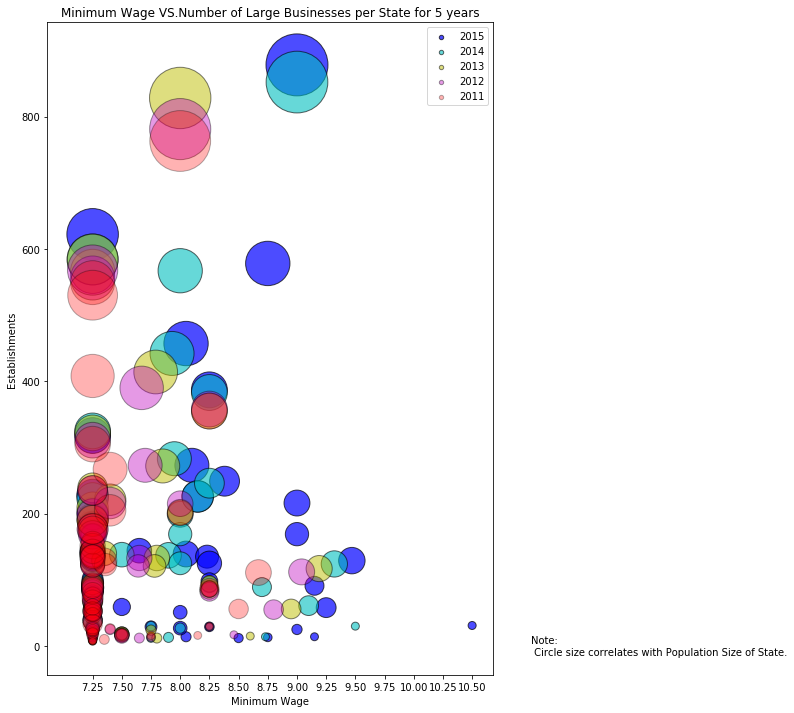

In [301]:
#graph minimum wage vs Establishments 
#Set figure size
fig = plt.figure(figsize=(8,12))

lar_min_wage_plot_2015 = clean_combo_census.loc[clean_combo_census["Year"] == "2015"]
lar_min_wage_plot_2014 = clean_combo_census.loc[clean_combo_census["Year"] == "2014"]
lar_min_wage_plot_2013 = clean_combo_census.loc[clean_combo_census["Year"] == "2013"]
lar_min_wage_plot_2012 = clean_combo_census.loc[clean_combo_census["Year"] == "2012"]
lar_min_wage_plot_2011 = clean_combo_census.loc[clean_combo_census["Year"] == "2011"]

pop_count_2015 =lar_min_wage_plot_2015["Population"]/10000
pop_count_2014 =lar_min_wage_plot_2014["Population"]/10000
pop_count_2013 =lar_min_wage_plot_2013["Population"]/10000
pop_count_2012 =lar_min_wage_plot_2012["Population"]/10000
pop_count_2011 =lar_min_wage_plot_2011["Population"]/10000

#plot with the colors
colors = ['b', 'c', 'y', 'm', 'r']
lar_min_wage_plot_2015 = plt.scatter(lar_min_wage_plot_2015["Minimum Wage"],lar_min_wage_plot_2015["Large Business Number of Establishments"],
                                       c=colors[0],s=pop_count_2015, edgecolors='black',alpha=0.7)
lar_min_wage_plot_2014 = plt.scatter(lar_min_wage_plot_2014["Minimum Wage"],lar_min_wage_plot_2014["Large Business Number of Establishments"],
                                       c=colors[1],s=pop_count_2014,edgecolors='black',alpha=0.6)
lar_min_wage_plot_2013 = plt.scatter(lar_min_wage_plot_2013["Minimum Wage"],lar_min_wage_plot_2013["Large Business Number of Establishments"],
                                       c=colors[2],s=pop_count_2013,edgecolors='black',alpha=0.5)
lar_min_wage_plot_2012 = plt.scatter(lar_min_wage_plot_2012["Minimum Wage"],lar_min_wage_plot_2012["Large Business Number of Establishments"],
                                       c=colors[3],s=pop_count_2012,edgecolors='black',alpha=0.4)
lar_min_wage_plot_2011 = plt.scatter(lar_min_wage_plot_2011["Minimum Wage"],lar_min_wage_plot_2011["Large Business Number of Establishments"],
                                       c=colors[4],s=pop_count_2011,edgecolors='black',alpha=0.3)

#Add labels to the x and y axes
plt.title("Minimum Wage VS.Number of Large Businesses per State for 5 years")
plt.xlabel("Minimum Wage")
plt.ylabel("Establishments")
plt.legend((lar_min_wage_plot_2015,lar_min_wage_plot_2014, lar_min_wage_plot_2013, lar_min_wage_plot_2012,lar_min_wage_plot_2011)
           ,("2015", "2014", "2013","2012","2011"),markerscale=.1)

plt.xticks(np.arange(7.25,10.75,.25), size = 10)
plt.text(11, 0,'Note: \n Circle size correlates with Population Size of State.',
     horizontalalignment='left',
     verticalalignment='center')
# Save Figure
plt.savefig("Min_wage vs. lar Est.png")

plt.show()


In [302]:
# Business Types Sums

# Small Business Sums
#sb2011_sums
#sb2012_sums
#sb2013_sums
#sb2014_sums
#sb2015_sums


# Medium Business Sums
#mb2011_sums
#mb2012_sums
#mb2013_sums
#mb2014_sums
#mb2015_sums


# Large Business Sums
#lb2011_sums
#lb2012_sums 
#lb2013_sums 
#lb2014_sums
#lb2015_sums 


In [303]:
# Business Types Sums

# Small Business Pay Sums

sb_sums = pd.concat([sb2011_sums, sb2012_sums, sb2013_sums, sb2014_sums, sb2015_sums])
sb_paysums = sb_sums['Small Business Annual Pay'].sum()
sb_employeesums = sb_sums['Small Business Employees'].sum()
sb_ppp = sb_paysums/sb_employeesums
sb_paysums



# Medium Business Pay Sums
mb_sums = pd.concat([mb2011_sums, mb2012_sums, mb2013_sums, mb2014_sums, mb2015_sums])
mb_paysums = mb_sums['Medium Business Annual Pay'].sum()
mb_employeesums = mb_sums['Medium Business Employees'].sum()
mb_ppp = mb_paysums/mb_employeesums
mb_paysums



# Large Business Pay Sums
lb_sums = pd.concat([lb2011_sums, lb2012_sums, lb2013_sums, lb2014_sums, lb2015_sums])
lb_paysums = lb_sums['Large Business Annual Pay'].sum()
lb_employeesums = lb_sums['Large Business Employees'].sum()
lb_ppp = lb_paysums/lb_employeesums
lb_paysums


5501711694

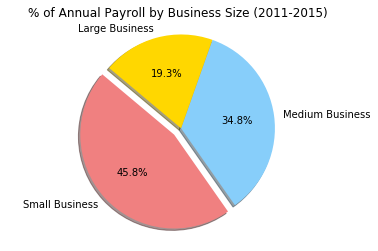

In [304]:
biz_size = ['Small Business', 'Medium Business', 'Large Business']
pay_sums = [sb_paysums, mb_paysums, lb_paysums ]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0)
plt.pie(pay_sums, explode=explode, labels=biz_size, colors=colors, 
       autopct = '%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('% of Annual Payroll by Business Size (2011-2015)')

plt.show()

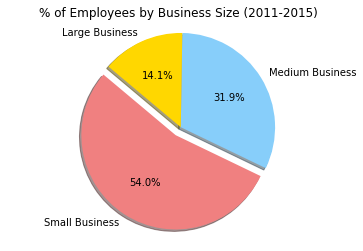

In [305]:
biz_size = ['Small Business', 'Medium Business', 'Large Business']
pay_sums = [sb_employeesums, mb_employeesums, lb_employeesums ]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0)
plt.pie(pay_sums, explode=explode, labels=biz_size, colors=colors, 
       autopct = '%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('% of Employees by Business Size (2011-2015)')

plt.show()

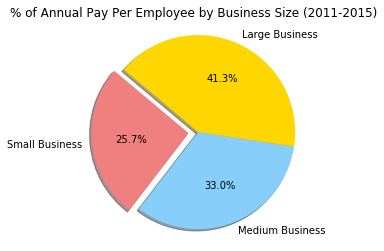

In [306]:
biz_size = ['Small Business', 'Medium Business', 'Large Business']
pay_sums = [sb_ppp, mb_ppp, lb_ppp ]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0)
plt.pie(pay_sums, explode=explode, labels=biz_size, colors=colors, 
       autopct = '%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('% of Annual Pay Per Employee by Business Size (2011-2015)')

plt.show()